# **AutoML with PyCaret-classification**

[PyCaret](https://pycaret.org/): opern-source low-code machine learning library in Python that automates machine learning workflows.
Extra reading: [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

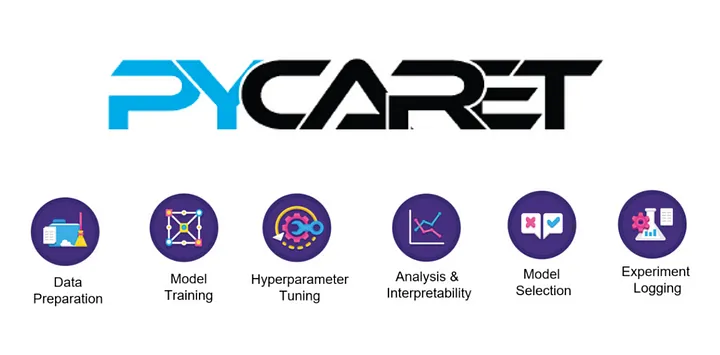

**Image source:** [medium](https://alam-jane61.medium.com/classification-problem-with-pycaret-a0eb43a2f1ca)

[Dataset](): Palmer's penguins.

Task: [Classification](https://en.wikipedia.org/wiki/Machine_learning), palmerpenguins.

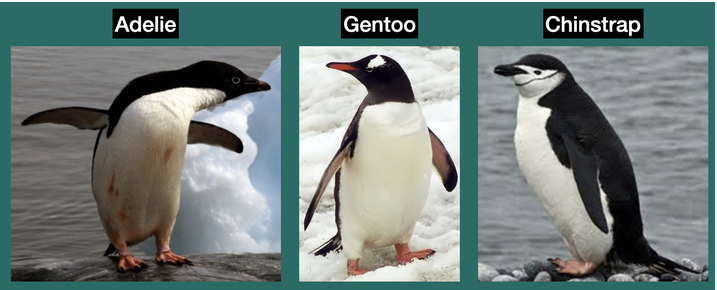

**Import libraries:**

In [1]:
# pycaret and it dependencies
#!pip install pycaret
#!pip install -r requirements.txt
#!pip install -r requirements-optional.txt

In [2]:
# scipy
#!pip uninstall scipy
#!pip install scipy

In [3]:
# pandas, matplotlib and seaborn for wrangling and viusalization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the dataset:**

In [4]:
# install palmergenguins
#!pip install palmerpenguins

In [5]:
# import and load the dataset from the palmergenguin python library
from palmerpenguins import load_penguins
penguins = load_penguins()

# create a copy for analysis
df = penguins.copy()

**Basic EDA and sanity check:**

In [6]:
# head (first 5 rows of the dataset)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
# columns as list
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

In [8]:
# shape of the dataset
df.shape

(344, 8)

In [9]:
# check datatypes
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [10]:
# check for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
# dropna and clean the dataset then assigned to new
df_new = df.dropna()
df_new.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

**After some sanity check and basic EDA we have get a sense of our dataset, now let's jump into the the nitty-gritty of [PyCaret](pycaret.org) for performing classification tasks**

In [12]:
# set features
features = df_new.drop('species', axis=1)

# target variable
target = df_new['species']

In [13]:
# import
from pycaret.classification import models, setup, compare_models, create_model, tune_model, plot_model

In [14]:
%%time
# set our target
exp_clf = setup(data = df_new, target='species')
# evaluate criteria/metrics "accuracy")
best = compare_models(sort="Accuracy")

,Description,Value
0,Session id,8213
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
4,Original data shape,"(333, 8)"
5,Transformed data shape,"(333, 10)"
6,Transformed train set shape,"(233, 10)"
7,Transformed test set shape,"(100, 10)"
8,Ordinal features,1
9,Numeric features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9958,0.9998,0.9958,0.9962,0.9957,0.9933,0.9936,0.1810
ridge,Ridge Classifier,0.9957,0.0000,0.9957,0.9964,0.9957,0.9933,0.9936,0.1660
lda,Linear Discriminant Analysis,0.9957,1.0000,0.9957,0.9964,0.9957,0.9933,0.9936,0.0860
rf,Random Forest Classifier,0.9915,0.9995,0.9915,0.9922,0.9912,0.9865,0.9870,0.4650
et,Extra Trees Classifier,0.9913,1.0000,0.9913,0.9924,0.9912,0.9865,0.9870,0.2420
gbc,Gradient Boosting Classifier,0.9875,0.9995,0.9875,0.9885,0.9875,0.9803,0.9808,0.4050
xgboost,Extreme Gradient Boosting,0.9873,0.9998,0.9873,0.9888,0.9871,0.9800,0.9808,0.1140
lr,Logistic Regression,0.9870,1.0000,0.9870,0.9886,0.9868,0.9796,0.9805,1.1860
dt,Decision Tree Classifier,0.9703,0.9779,0.9703,0.9736,0.9706,0.9535,0.9548,0.1360
nb,Naive Bayes,0.8368,0.9983,0.8368,0.9109,0.8364,0.7607,0.7943,0.1440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 6.74 s, sys: 362 ms, total: 7.1 s
Wall time: 49.4 s


###**Result:**
as you can see the best estimator is "Light Gradient Boosting Machine" with an accuracy of
99.58%, AUC of 99.98% and Recall of 99.58%.



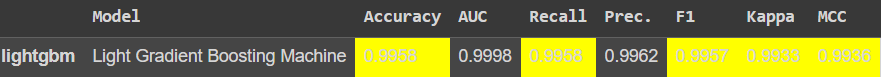

**Let's create the model:**

by passing the "lightgbm" string to the <code> create_model("lightgbm")</code>

In [23]:
%%time
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9583,0.9978,0.9583,0.9618,0.9569,0.9333,0.9361
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 470 ms, sys: 15.2 ms, total: 485 ms
Wall time: 3.65 s


**Let's tune the model:**


In [24]:
%%time
# pass the created model
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,1.0000,0.9583,0.9653,0.9592,0.9355,0.9381
1,0.9583,0.9946,0.9583,0.9618,0.9569,0.9333,0.9361
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
CPU times: user 1.77 s, sys: 74.3 ms, total: 1.84 s
Wall time: 34.2 s


###**Use the model to make predictions:**
<code>predict_model function from PyCaret:</code>

In [25]:
# import predict_model, save_model and load_model
from pycaret.classification import predict_model, save_model, load_model

**Use the predict_model function to return a dataFrame with all the values and the predicted values:**

Note: This will automatically apply any feature transformations that had been done during model selection, such as categorical to numeric conversions. This returns a DataFrame with the same features as the input features DataFrame, but now with a new Label column, which has the predictions. For regression, this simply provides the numeric prediction [from the book]().

In [26]:
prediction_df = predict_model(lr, features)

In [27]:
# rename "prediction_label" to "default_predictions"
prediction_df.rename(columns={"prediction_label":"species_predictions"},
                  inplace=True,
                  errors='raise')

In [28]:
# overview of the newDataFrame
prediction_df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_predictions,prediction_score
0,Torgersen,39.099998,18.700001,181.0,3750.0,male,2007,Adelie,1.0000
1,Torgersen,39.500000,17.400000,186.0,3800.0,female,2007,Adelie,0.9998
2,Torgersen,40.299999,18.000000,195.0,3250.0,female,2007,Adelie,0.9838
4,Torgersen,36.700001,19.299999,193.0,3450.0,female,2007,Adelie,1.0000
5,Torgersen,39.299999,20.600000,190.0,3650.0,male,2007,Adelie,1.0000


**Once we have our optimized model, we can save it to a pickle file like so:**

In [29]:
save_model(best, 'Light_Gradient_Boosting_Machine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['bill_length_mm', 'bill_depth_mm',
                                              'flipper_length_mm', 'body_mass_g',
                                              'year'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_valu...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
        

**To load the model:**

In [30]:
lr_model = load_model('Light_Gradient_Boosting_Machine')

Transformation Pipeline and Model Successfully Loaded


####**Further reading:** [Yellowbrick](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html), [Pycaret](https://pycaret.gitbook.io/docs/)
